## Identifying Indicators of Heavy Traffic on I-94

For this project the goal will be to analyze and determine what contributes most to heavy traffic on the I-94 interstate highway. Some of these indicators can be viewed in the dataset dictionary.

The dataset dictionary can be seen below:

- `holiday` Categorical US National holidays plus regional holiday, Minnesota State Fair
- `temp` Numeric Average temp in kelvin
- `rain_1h` Numeric Amount in mm of rain that occurred in the hour
- `snow_1h` Numeric Amount in mm of snow that occurred in the hour
- `clouds_all` Numeric Percentage of cloud cover
- `weather_main` Categorical Short textual description of the current weather
- `weather_description` Categorical Longer textual description of the current weather
- `date_time` DateTime Hour of the data collected in local CST time
- `traffic_volume` Numeric Hourly I-94 ATR 301 reported westbound traffic volume

### The I-94 dataset
This dataset was contributed by John Hogue to the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume


In [2]:
import pandas as pd
i_94 = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


### Observations

- The dataset has 48,204 rows and 9 columns. The nice thing about the dataset is that there is no null values. It looks like the rows describe the traffic and weather situation for a certain hour of the day. 

- The time span of the data looks to be from 2012-10-02 09:00:00 to 2018-09-30 23:00:00.

### How data is collected

- From the data documentation at the link from earlier we can see that MN DoT ATR station 301 which is rough midway point between Minneapolois and St. Paul, MN is where the data is collected. Upon further research we can tell that the station collects data from cars headed west. 

    - Essentially this analysis will be about the westbound traffic that is in relative proximity to the station. 

### Traffic Volume Analysis
We'll start the analysis by having a look at the `traffic_volume` column. 

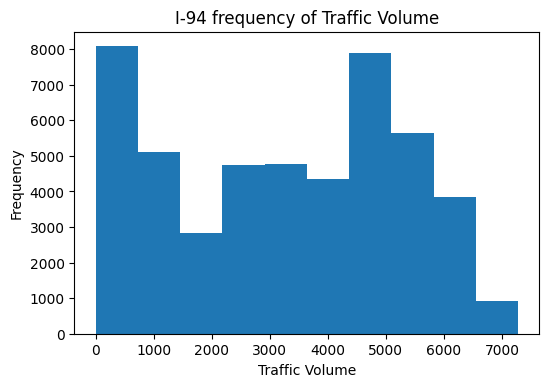

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94["traffic_volume"].plot.hist()
plt.xlabel("Traffic Volume")
plt.title("I-94 frequency of Traffic Volume")
plt.show()

In [6]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

### Observations of `traffic_volume`

- During the time frame **from 2012-10-02 09:00:00 and 2018-09-30 23:00:00** the hourly traffic volume ranged from 0 to 7,280 cars. 
- The average number of cars was around 3,260 cars. 
- Around 25% of the time there 1,193 cars. 
- 75% of the time there was 4,933 cars. 


### Is there a difference between Day and Night Traffic?

My initial assumption is that the traffic would start with high-levels in the morning, slow-down during the mid-day, and pick up in the evening when people are on their way home. 

We'll break the data up into two time frames:
- Daytime: 7 am to 7 pm (12 hours)
- Nightime: 7 pm to 7 am (12 hours)

**First,** we'll isolate the day and night time data. 

In [7]:
i_94["date_time"]= pd.to_datetime(i_94["date_time"])

day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94["date_time"].dt.hour < 19)]
print(day.shape)

(23877, 9)


In [8]:
night = i_94.copy()[(i_94["date_time"].dt.hour >= 19) | (i_94["date_time"].dt.hour < 7)]
print(night.shape)

(24327, 9)


The first that I've noticed is the significant difference in amounts for the different time perious. There doesn't seem to be data for two hours 4 and 5.

### Visualizing the differences between `traffic_volume`: Day vs. Night

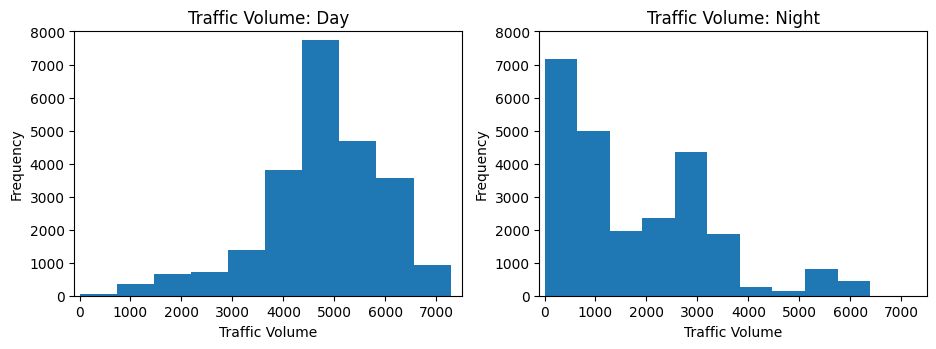

In [9]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Volume: Day")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2,)
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Volume: Night")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")
plt.show()

In [10]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

### Analysis

Day
- The histogram above shows that the distribution of the day-time traffic volume is left-skewed. Interpreting this, I'd say that most of the traffic volumes are high. 75% of the tie there are more than 4,252 cars in traffic. 

Night
- The histogram for the night traffic volume histogram is right skewed indicating that the traffic volumes during this time of day are relatively small overall. 
- The average number of cars during this period are 1,785 cars. 
- 75% of the time the number of cars passing the station was less than 2,819. 
- There are a few points where the number of vehicles gets above 5,000, but overall the totals at night are much lower than during the daytime.

**Remember** our goal is to identify heavy traffic indicators in the dataset. We have identified that the night time overall is light on traffic, so we'll exclude it from the rest of our analysis. 

### Exploring time as an indicator of Heavy Traffic

One of many possible indicators of heavy traffic is the time. There are usually different levels of traffic at different times of the day, time of the year, or on a specific holiday. 

We'll have a look at how traffic volume changed by some of the parameters below:

- Month
- Day of the week
- Time of day



In [12]:
# Creates new column where each value describes the month when the measurement was taken
day['month'] = day["date_time"].dt.month

# Group the dataset by `month`
by_month = day.groupby('month').mean()
by_month["traffic_volume"]

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

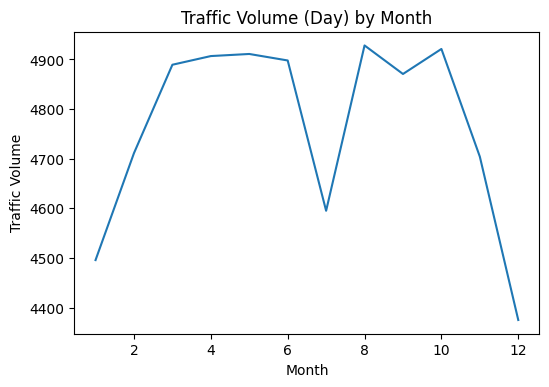

In [16]:
# Generate a plot for the data above
by_month["traffic_volume"].plot.line()
plt.title("Traffic Volume (Day) by Month")
plt.xlabel("Month")
plt.ylabel("Traffic Volume")
plt.show()

### Observations (Month)

- First, the traffic volume numbers seem to tumble during the winter months and start to rise when Spring comes. 
- There's an exception to this observation though. Traffic plummets during the warm month of July? What could be the cause of this? Summer vacation? People avoiding the heat?

We'll have a look at that question next. 

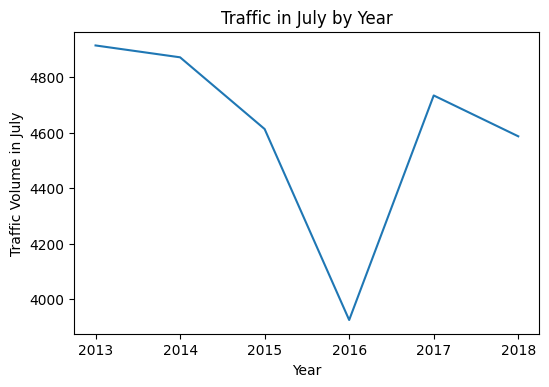

In [22]:
day["year"] = day["date_time"].dt.year
only_july = day[day["month"] == 7]
only_july.groupby("year").mean()["traffic_volume"].plot.line()
plt.title("Traffic in July by Year")
plt.ylabel("Traffic Volume in July")
plt.xlabel("Year")
plt.show()


Traffic has been heavy in July with the exception of 2016. There was a massive decrease in volume during this year. 

- There was a road construction project happening at the time and that could be a reason for that. Here's an article that gives a little insight: https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696

### Time Indicators (pt. 2)

In [18]:
day["dayofweek"] = day["date_time"].dt.dayofweek
by_dayofweek = day.groupby("dayofweek").mean()
by_dayofweek["traffic_volume"]

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

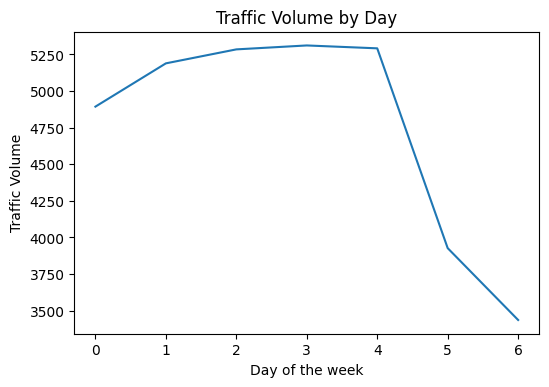

In [20]:
by_dayofweek["traffic_volume"].plot.line()
plt.title("Traffic Volume by Day")
plt.xlabel("Day of the week")
plt.ylabel("Traffic Volume")
plt.show()

### Observation (Day)

- The traffic volume is significantly higher during the week. 
- After Friday at index 4 Saturday and Sunday see significant drop offs in traffic volumen levels. The values stay below 4,000 on the weekend. 

### Time Indicators (pt. 3)

Finally, we are going to have a look at values we have based on the day. The weekend values will drag down the average overall, so we're going to split the two up and have a look. 



In [23]:
# Split weekday and weekend data up
day["hour"] = day["date_time"].dt.hour
business_days = day.copy()[day["dayofweek"] <= 4] #4 stands for Friday

In [24]:
# Same for the weekend
weekend = day.copy()[day["dayofweek"] > 4]

In [28]:
business_days.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,year,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,2012,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,2012,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,2012,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,2012,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,2012,13


In [29]:
business_days.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,year,hour
48143,None,285.00,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 14:00:00,5193,9,4,2018,14
48144,None,285.14,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 15:00:00,5838,9,4,2018,15
48145,None,285.33,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 16:00:00,6188,9,4,2018,16
48146,None,285.24,0.0,0.0,75,Clouds,broken clouds,2018-09-28 17:00:00,5695,9,4,2018,17
48147,None,284.39,0.0,0.0,40,Clouds,scattered clouds,2018-09-28 18:00:00,5104,9,4,2018,18


In [30]:
weekend.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,year,hour
87,None,275.17,0.0,0.0,1,Clear,sky is clear,2012-10-06 07:00:00,2072,10,5,2012,7
88,None,274.99,0.0,0.0,1,Clear,sky is clear,2012-10-06 08:00:00,3342,10,5,2012,8
89,None,275.09,0.0,0.0,40,Clouds,scattered clouds,2012-10-06 09:00:00,4258,10,5,2012,9
90,None,276.88,0.0,0.0,20,Clouds,few clouds,2012-10-06 10:00:00,4861,10,5,2012,10
91,None,278.04,0.0,0.0,20,Clouds,few clouds,2012-10-06 11:00:00,5191,10,5,2012,11


In [31]:
weekend.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,year,hour
48194,None,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,6,2018,15
48195,None,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,6,2018,15
48196,None,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,6,2018,16
48197,None,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,6,2018,17
48198,None,284.20,0.25,0.0,75,Rain,light rain,2018-09-30 18:00:00,3947,9,6,2018,18


In [34]:
by_hour_business = business_days.groupby("hour").mean()
by_hour_weekend = weekend.groupby("hour").mean()

print(by_hour_business["traffic_volume"])
print(by_hour_weekend["traffic_volume"])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


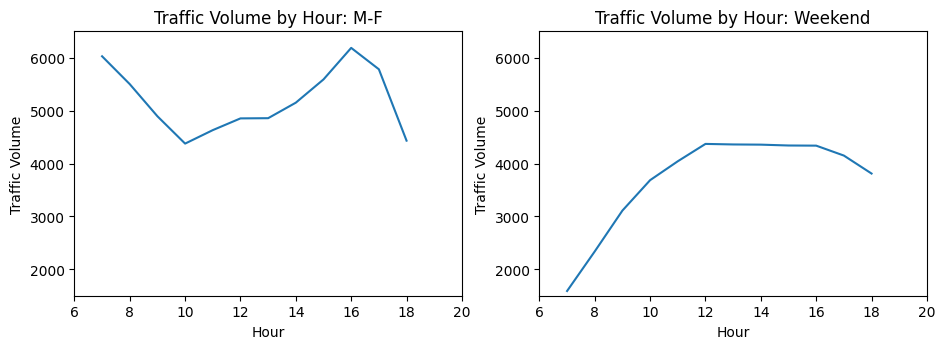

In [39]:
# Plot to visualize the difference between times of day on weekdays vs. the weekend. 
plt.figure(figsize=(11, 3.5))

# Weekday Plot
plt.subplot(1, 2, 1)
by_hour_business["traffic_volume"].plot.line()
plt.title("Traffic Volume by Hour: M-F")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.xlim(6, 20)
plt.ylim(1500, 6500)

# Weekend Plot
plt.subplot(1, 2, 2)
by_hour_weekend["traffic_volume"].plot.line()
plt.title("Traffic Volume by Hour: Weekend")
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")
plt.xlim(6, 20)
plt.ylim(1500, 6500)

plt.show()


### Observation

The traffic is generally higher at every hour of the day compared to on the weekend. The rush hour on weekdays tends to be around 5:00 pm. 

#### Weekdays
- The quiet period is from 10:00 am until 2:00 pm. The exception to this is when people return home in the afternoon around 6:00 pm.

#### Weekends
- Traffic on the weekends peak from 7:00 am until around 12:00 pm. 

### Final time takeaways
- Summer months typically have heavier traffic volumes. 
- Traffic is heavier during the week. 
- The rush hour for traffic on weekdays starts around 5:00 pm. 

### Weather Indicators

Up to this point the focus was on time indicators for heavy traffic. What I'll be doing next is pivoting to examine what kind of weather indicators influence heavy traffic.

We've identified some columns that provide useful information about weather:
`temp`, `rain_1h`, `snow_wh`, `clouds_all`, `weather_main`, `weather_description`.

We'll start by having a look between their correlation with the `traffic_volume` column.

In [40]:
day.corr()["traffic_volume"]

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
year             -0.003557
hour              0.172704
Name: traffic_volume, dtype: float64

The columns that show up above are numerical columns. We can see that `temp` has the strongest correlation possitive correlation to `traffic_volume`.

Text(0, 0.5, 'Temperature')

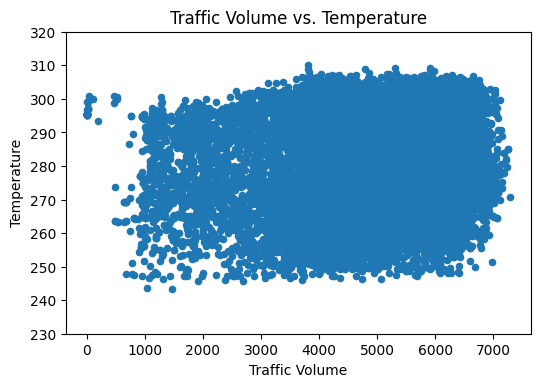

In [44]:
day.plot.scatter("traffic_volume", "temp")
plt.ylim(230, 320)
plt.title("Traffic Volume vs. Temperature")
plt.xlabel("Traffic Volume")
plt.ylabel("Temperature")

### Observation
- Looking at the chart above there doesn't seem to be a correlation in either the positive or negative direction when `temp` and `traffic_volume` are compared. Therefore, temp isn't a reliable indicator for heavy traffic. 

In [46]:
day.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,dayofweek,year,hour
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,1,2012,9
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,1,2012,10
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,1,2012,11
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,1,2012,12
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,1,2012,13


In [45]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
 9   month                23877 non-null  int64         
 10  dayofweek            23877 non-null  int64         
 11  year                 23877 non-null  int64         
 12  hour                 23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3

- Looking above we can see that `weather_main` and `weather_description` are two other features that have to do with weather. These are both in object form (strings).  

### Looking at Weather Types
We'll have a look at the averages for `weather_main` and `weather_type`. 

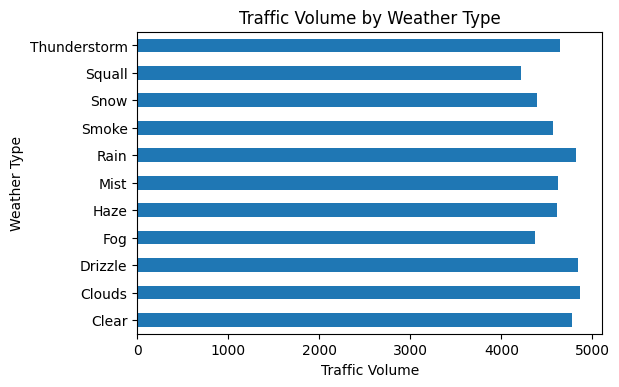

In [49]:
by_weather_main = day.groupby("weather_main").mean()
by_weather_main["traffic_volume"].plot.barh()
plt.title("Traffic Volume by Weather Type")
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Type")
plt.show()

### Observations
- There are no weather types that exceed 5000 cars. It's difficult to ascertain whether or not `weather_type` is a reliable indicator of heavy traffic. 

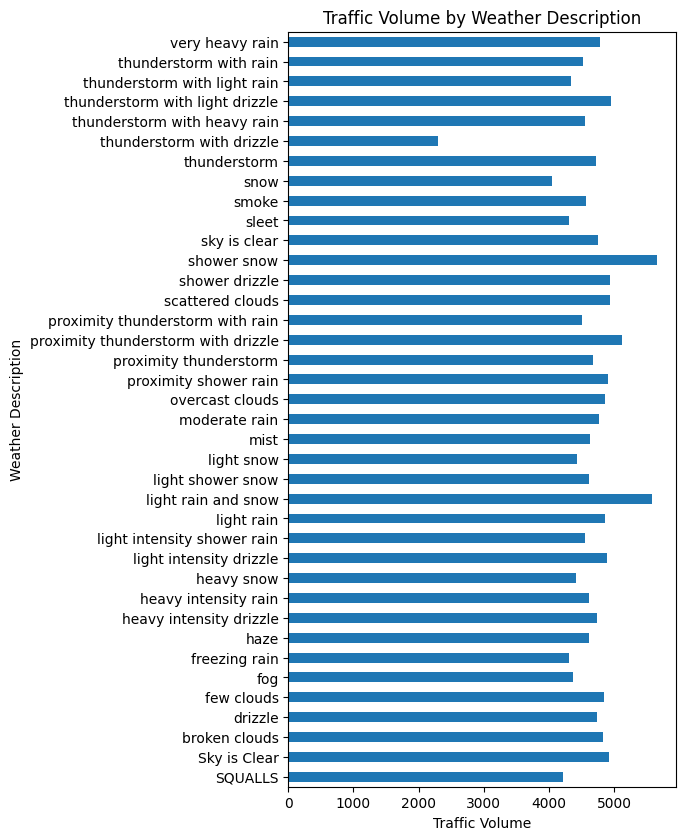

In [54]:
# Weather Description Bar Plot
by_weather_description = day.groupby("weather_description").mean()

#Plot
by_weather_description["traffic_volume"].plot.barh(figsize= (5, 10))
plt.title("Traffic Volume by Weather Description")
plt.xlabel("Traffic Volume")
plt.ylabel("Weather Description")

plt.show()


### Observations
There are three weather types that exceed 5,000 cars (heavy traffic baseline). These are:
- light snow
- heavy snow
- thunderstorms with drizzle

This isn't obscene weather. Maybe people take cars instead of riding their bikes or using public tranport which requires some walking when there is bad weather. 

### Conclusion

During this project we had a look at two possible indicators of heavy traffic on the I-94 Interstate Highway. These indictators were:

- Time Indicators
    -